# Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
# Вычисляет среднеквадратическую ошибку
def mse(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [3]:
# Строит график MSE в зависимости от числа итераций
def plot_mse(errors, title='MSE'):
    plt.plot(range(len(errors[-100:])), errors[-100:])
    plt.title(title)
    plt.xlabel('Количество итераций')
    plt.ylabel('MSE')
    plt.grid()
    plt.show() 

### Задание 1

*Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска.*

*Построить графики среднеквадратичной ошибки (MSE) от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.*

In [4]:
# Число признаков
n_features = 2

# Сгенерируем датасет из 1000 объектов со стандартным отклонением равным 5
data, target, coef = datasets.make_regression(n_samples=1000, n_features=n_features, n_informative=2, n_targets=1, 
                                              noise=5, coef=True, random_state=2)

In [5]:
# Стандартизация

# Получим средние значения и стандартное отклонение по столбцам
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)

# Вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

Градиентный спуск

In [6]:
%%time
# Веса
w = np.zeros(n_features)

# Список векторов весов после каждой итерации
w_list = [w.copy()]

# Список значений ошибок после каждой итерации
errors_gd = []

# Шаг градиентного спуска
eta = 0.01

# Максимальное число итераций
max_iter = 1e4

# Критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# Зададим начальную разницу весов большим числом
weight_dist = np.inf

# Счетчик итераций
iter_num = 0

X = data
Y = target

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors_gd.append(mse(X, new_w, Y))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors_gd[-1], 4)}')

В случае использования градиентного спуска функционал ошибки составляет 38.5683
Wall time: 76.8 ms


Стохастический градиентный спуск

In [7]:
%%time
# Инициализируем начальный вектор весов
w = np.zeros(n_features)

# Список векторов весов после каждой итерации
w_list = [w.copy()]

# Список значений ошибок после каждой итерации
errors_sgd = []

# Шаг градиентного спуска
eta = 0.01

# Максимальное число итераций
max_iter = 1e5

# Критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# Зададим начальную разницу весов большим числом
weight_dist = np.inf

# Счётчик итераций
iter_num = 0

# Фиксируем случайность выборки
np.random.seed(1234)

# Ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # Генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, 
                                 (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]

    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors_sgd.append(mse(data, new_w, target))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors_sgd[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 248.3494
Wall time: 7.23 s


Построим графики среднеквадратичной ошибки (MSE) от числа итераций для обоих методов.

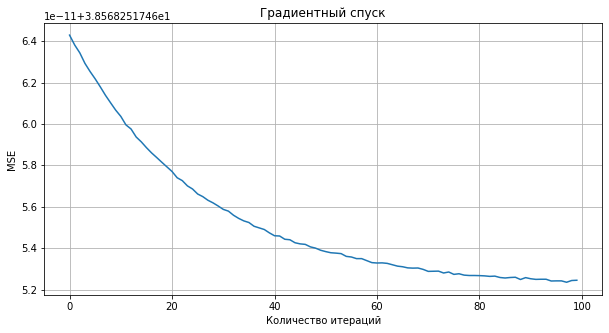

In [8]:
# Градиентный спуск
plot_mse(errors_gd, 'Градиентный спуск')

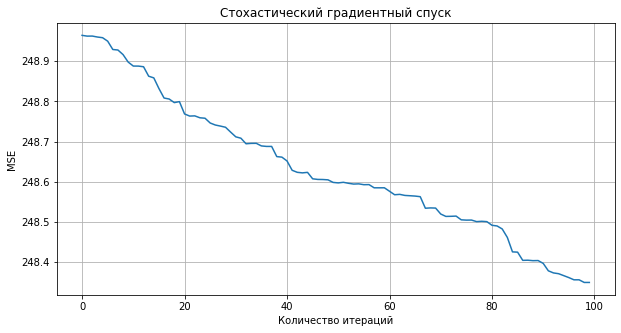

In [9]:
# Стохастический градиентный спуск
plot_mse(errors_sgd, 'Стохастический градиентный спуск')

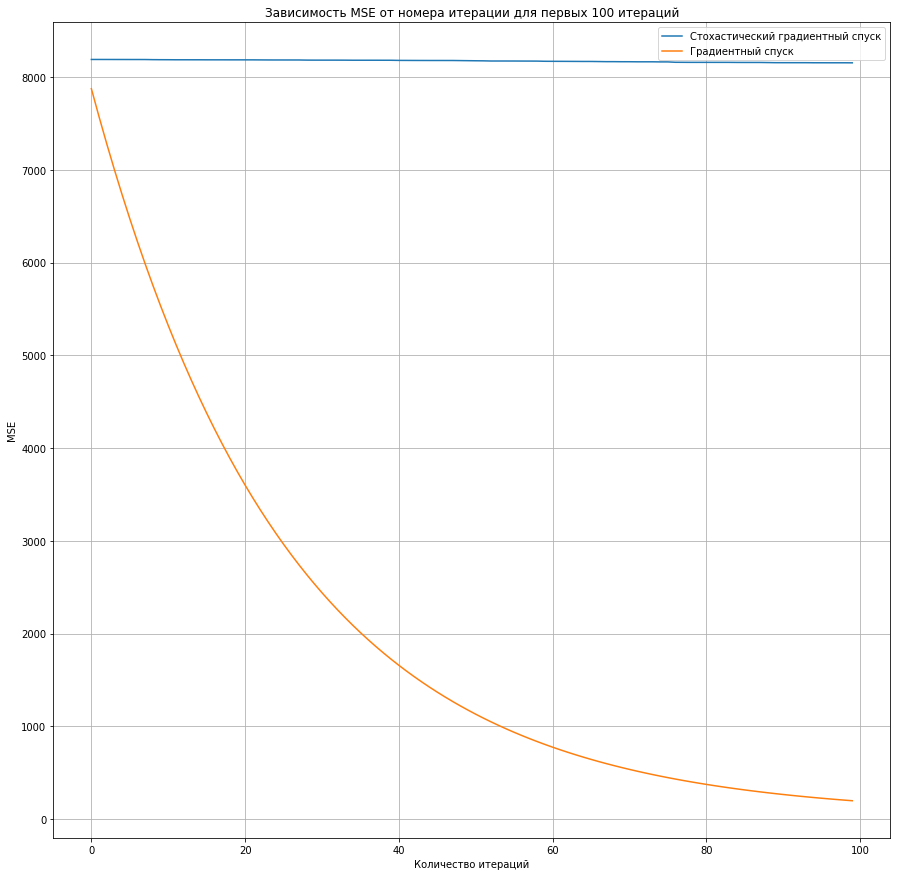

In [10]:
# Два метода на одном графике
plt.figure(figsize=(15, 15))

plt.plot(range(len(errors_sgd[:100])), errors_sgd[:100], label='Стохастический градиентный спуск')
plt.plot(range(len(errors_gd[:100])), errors_gd[:100], label='Градиентный спуск')

plt.title('Зависимость MSE от номера итерации для первых 100 итераций')
plt.xlabel('Количество итераций')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show() 

Из графиков видно, что обычный градиентый спуск сходится быстрее, чем стохастический.